# Ejemplo práctico ECLAT

## 1. Importar librerias

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from fim import eclat

%matplotlib notebook

## 2. Cargar archivo

https://www.kaggle.com/mathchi/online-retail-data-set-from-ml-repository

In [5]:
df = pd.read_csv('retail_dataset.csv')
df.head()

0       1     2       3       4       5       6
0   Bread    Wine  Eggs    Meat  Cheese  Pencil  Diaper
1   Bread  Cheese  Meat  Diaper    Wine    Milk  Pencil
2  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
3  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
4    Meat  Pencil  Wine     NaN     NaN     NaN     NaN

## 3. Preprocesamiento

In [6]:
df.describe(include='all')

0     1     2     3     4       5      6
count     315   285   245   187   133      71     41
unique      9     9     9     9     9       9      9
top     Bread  Meat  Eggs  Milk  Wine  Pencil  Bread
freq       74    47    52    45    36      13     11

### Pasar datos a una lista

In [7]:
n = df.shape[0]
transactions = []

for i in range(0,n):
    transaction = []
    m = df.shape[1]
    for j in range(0,m):
            itm = str(df.values[i,j])
            if itm != "nan":
                transaction.append(itm)
            transactions.append(transaction)
        

transactions

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Mi

## 4. Reglas de asociación: ECLAT

In [8]:
# 's/c/l' = reporte soporte, confianza y lift

results = []

rules = eclat(tracts = transactions, target='r', supp = 20, conf = 50, zmin = 2, report = 's/c/l')
ant = [list(rules[i])[0] for i in range(len(rules))]
cons = [list(list(rules[i])[1]) for i in range(len(rules))]
supp = [list(rules[i])[2] for i in range(len(rules))]
conf = [list(rules[i])[4] for i in range(len(rules))]
lift = [list(rules[i])[6] for i in range(len(rules))]
print('Número de reglas de asociación : ',len(rules))

Número de reglas de asociación :  114


In [9]:
rule = pd.DataFrame({'antescedente': ant, 'consecuente': cons,'support': supp, 'confidence': conf, 'lift': lift})
rule = rule.sort_values(by=['support'], inplace=False, ascending=False)
rule.head(10)

antescedente consecuente   support  confidence      lift
7        Cheese      [Meat]  0.323810    0.680000  1.355696
8          Meat    [Cheese]  0.323810    0.645570  1.355696
3        Cheese      [Milk]  0.304762    0.607595  1.211344
4          Milk    [Cheese]  0.304762    0.607595  1.211344
39         Eggs    [Cheese]  0.298413    0.594937  1.358008
38       Cheese      [Eggs]  0.298413    0.681159  1.358008
0         Bread      [Milk]  0.279365    0.556962  1.103415
68        Bagel     [Bread]  0.279365    0.553459  1.301042
1          Milk     [Bread]  0.279365    0.553459  1.103415
67        Bread     [Bagel]  0.279365    0.656716  1.301042

## 5. Graficar

<IPython.core.display.Javascript object>


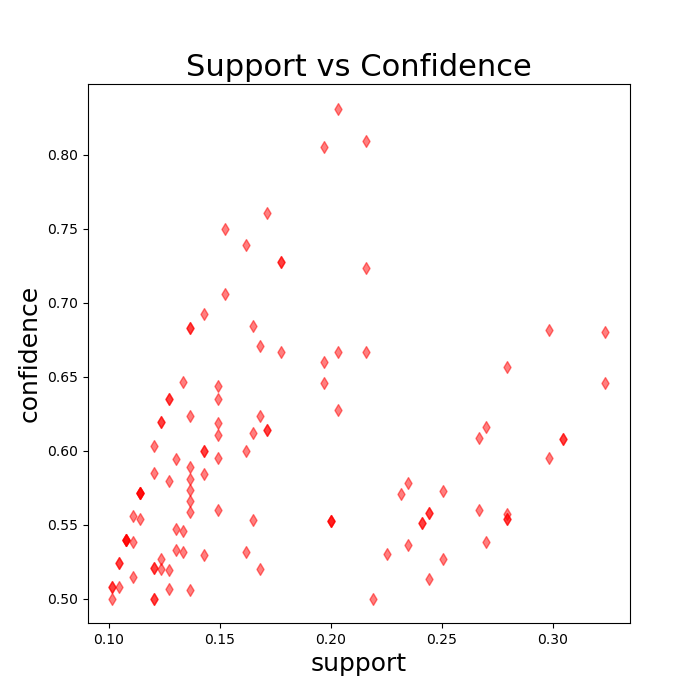

Text(0.5, 1.0, 'Support vs Confidence')

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(rule['support'], rule['confidence'], color='red',marker='d',alpha=0.5)
ax.set_xlabel('support',fontsize=18)
ax.set_ylabel('confidence',fontsize=18)
ax.set_title('Support vs Confidence',fontsize=22)

<IPython.core.display.Javascript object>


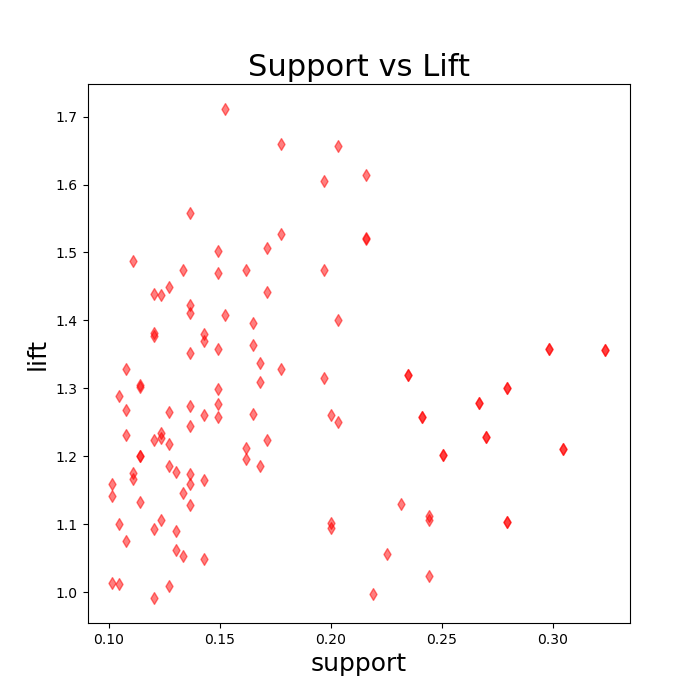

Text(0.5, 1.0, 'Support vs Lift')

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(rule['support'], rule['lift'], color='red',marker='d', alpha=0.5)
ax.set_xlabel('support',fontsize=18)
ax.set_ylabel('lift',fontsize=18)
ax.set_title('Support vs Lift',fontsize=22)


<IPython.core.display.Javascript object>


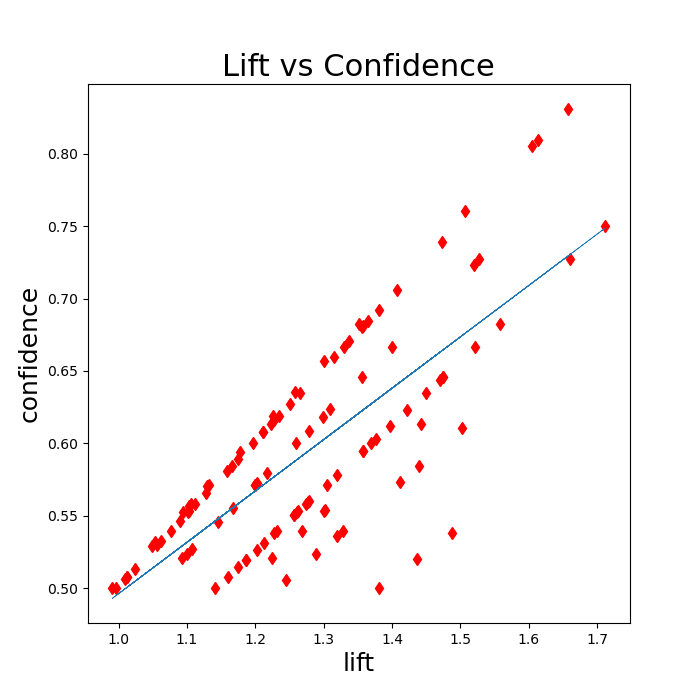

Text(0.5, 1.0, 'Lift vs Confidence')

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
fit = np.polyfit(rule['lift'], rule['confidence'], 1)
fit_fn = np.poly1d(fit)
ax.plot(rule['lift'], rule['confidence'],'rd',rule['lift'], fit_fn(rule['lift']),linewidth=0.5)
ax.set_xlabel('lift',fontsize=18)
ax.set_ylabel('confidence',fontsize=18)
ax.set_title('Lift vs Confidence',fontsize=22)

In [13]:
help(eclat)

Help on built-in function eclat in module fim:

eclat(...)
    eclat (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
           eval='x', agg='x', thresh=10, prune=None, algo='a', mode='',
           border=None)
    Find frequent item sets with the Eclat algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an item set     